In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
cols=['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']
Data=pd.read_excel('Auto_mpg.xlsx',names=cols,header=0,na_values='?')
Data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


# Exploratory Data Analysis

In [3]:
Data.shape

(397, 9)

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      391 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
model_year      397 non-null int64
origin          397 non-null int64
car_name        397 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [5]:
Data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [6]:
#Imputing NA values
from sklearn.impute import SimpleImputer
sim=SimpleImputer(strategy='mean')
Data.horsepower=sim.fit_transform(Data.horsepower.values.reshape(-1,1))
Data.horsepower.isna().sum()

0

In [7]:
Data.horsepower=pd.to_numeric(Data.horsepower)
Data.horsepower.dtype

dtype('float64')

Statistical Summary

In [8]:
Data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.528463,5.448363,193.139798,104.404092,2969.080605,15.577078,76.025189,1.574307
std,7.820926,1.698329,104.244898,38.225809,847.485218,2.755326,3.689922,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,76.000000,2223.000000,13.900000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,95.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3609.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Univariate  and Bivariate Analysis

In [9]:
Data.cylinders.unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [10]:
Data.cylinders.value_counts()

4    204
8    102
6     84
3      4
5      3
Name: cylinders, dtype: int64

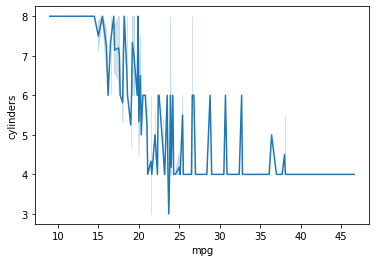

In [11]:
sns.lineplot(x='mpg',y='cylinders',data=Data)

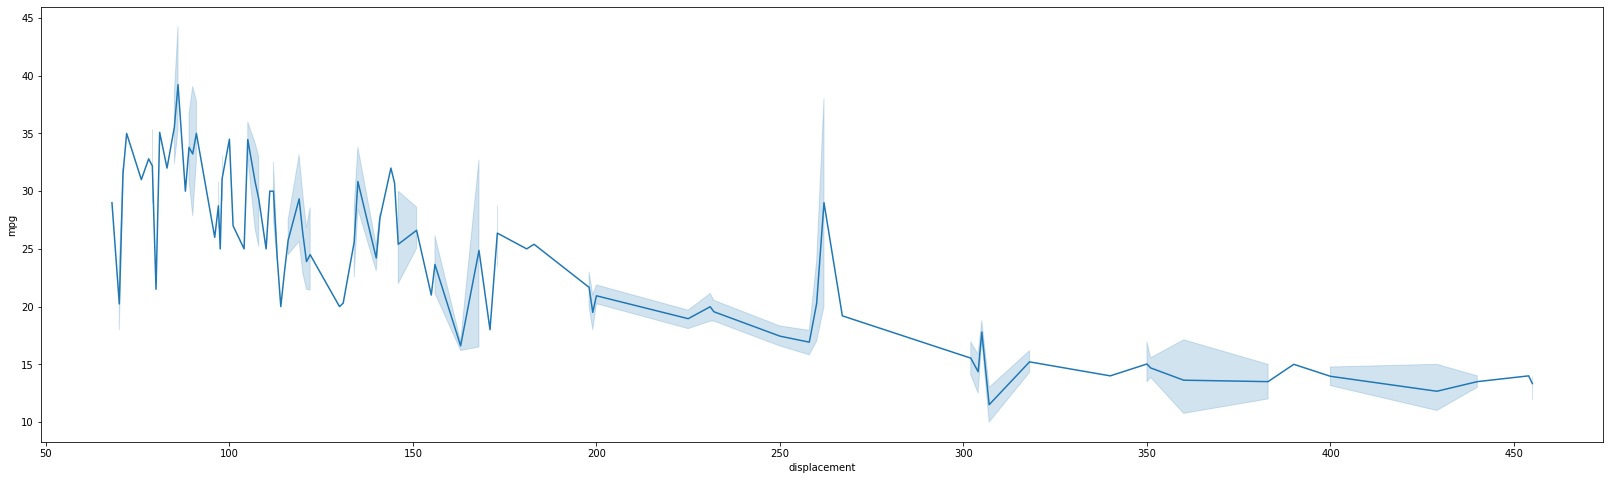

In [12]:
#displacement
dis=Data.sort_values(by='mpg',ascending=False)
plt.figure(figsize=(28,8))
sns.lineplot(x='displacement',y='mpg',data=dis)

In [13]:
#with increase in displcement mpg decreases

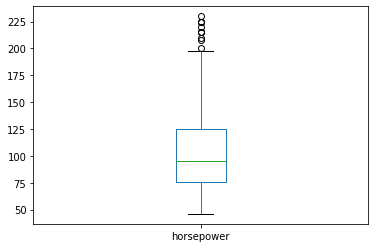

In [14]:
#horsepower
Data.horsepower.plot.box()

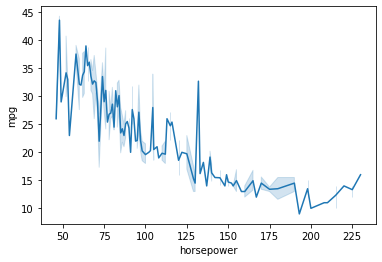

In [15]:
sns.lineplot(x='horsepower',y='mpg',data=Data)

In [16]:
#less the horsepower miles per gallon is more.

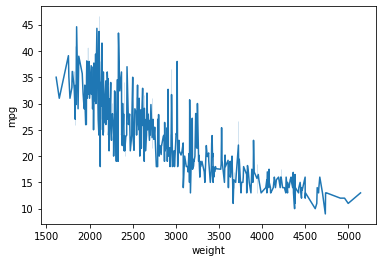

In [17]:
sns.lineplot(x='weight',y='mpg',data=Data)

In [18]:
#More hevey Cars are less mpg and light cars are showing more mpg.

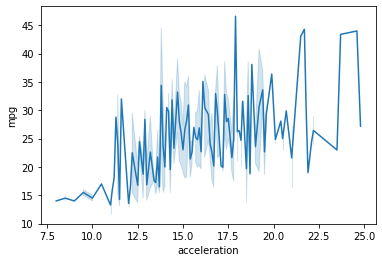

In [19]:
sns.lineplot(x='acceleration',y='mpg',data=Data)

In [20]:
#when acceleration is 17.5 the mpg is highest that is 46.60

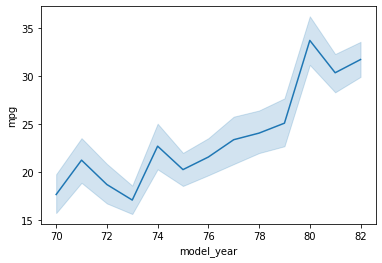

In [21]:
#year
sns.lineplot(x='model_year',y='mpg',data=Data)

In [22]:
#the Car models manufactured in 1980 are performing more mpg.

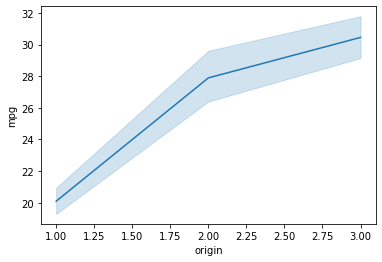

In [23]:
sns.lineplot(x='origin',y='mpg',data=Data)

In [24]:
#The cars originated from origin 1 is very less mpg and cars originated from origin 3 resulting high mpg.

In [25]:
Data.car_name.value_counts()

ford pinto                 6
toyota corolla             5
ford maverick              5
amc matador                5
amc hornet                 4
                          ..
chevrolet woody            1
ford f250                  1
renault lecar deluxe       1
chevrolet monte carlo s    1
datsun 810 maxima          1
Name: car_name, Length: 305, dtype: int64

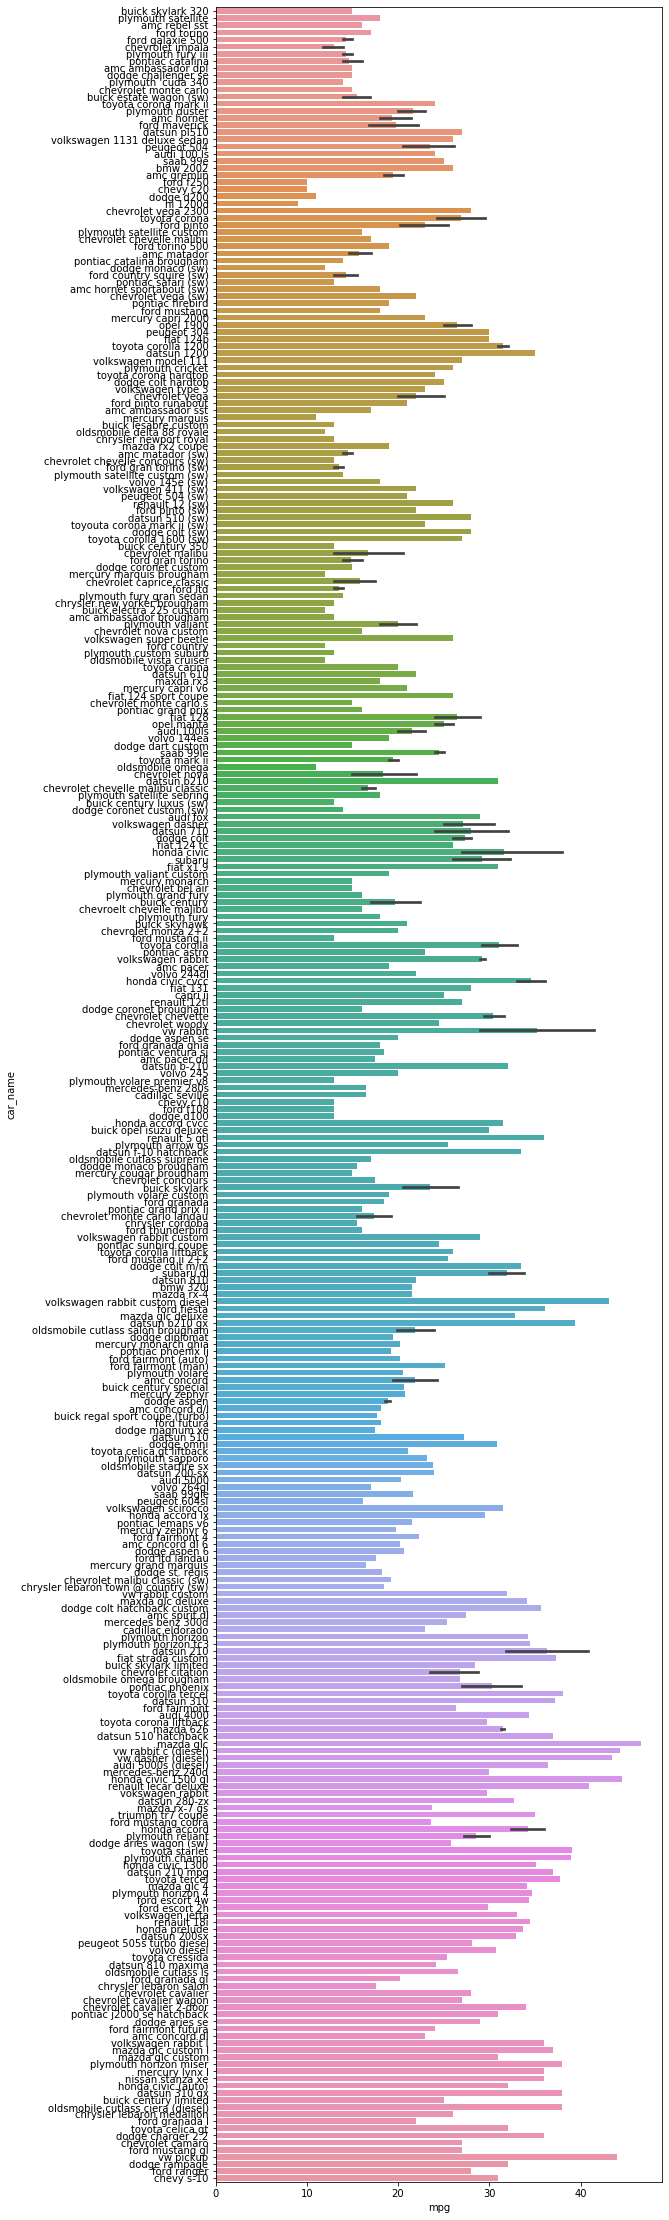

In [26]:
dis=Data.sort_values(by='mpg',ascending=False)
plt.figure(figsize=(8,40))
sns.barplot(x='mpg',y='car_name',data=Data)

In [27]:
Data.car_name.unique()

array(['buick skylark 320', 'plymouth satellite', 'amc rebel sst',
       'ford torino', 'ford galaxie 500', 'chevrolet impala',
       'plymouth fury iii', 'pontiac catalina', 'amc ambassador dpl',
       'dodge challenger se', "plymouth 'cuda 340",
       'chevrolet monte carlo', 'buick estate wagon (sw)',
       'toyota corona mark ii', 'plymouth duster', 'amc hornet',
       'ford maverick', 'datsun pl510', 'volkswagen 1131 deluxe sedan',
       'peugeot 504', 'audi 100 ls', 'saab 99e', 'bmw 2002',
       'amc gremlin', 'ford f250', 'chevy c20', 'dodge d200', 'hi 1200d',
       'chevrolet vega 2300', 'toyota corona', 'ford pinto',
       'plymouth satellite custom', 'chevrolet chevelle malibu',
       'ford torino 500', 'amc matador', 'pontiac catalina brougham',
       'dodge monaco (sw)', 'ford country squire (sw)',
       'pontiac safari (sw)', 'amc hornet sportabout (sw)',
       'chevrolet vega (sw)', 'pontiac firebird', 'ford mustang',
       'mercury capri 2000', 'opel 1900'

In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Data.car_name=le.fit_transform(Data.car_name)
Data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,15.0,8,350.0,165.0,3693,11.5,70,1,36
1,18.0,8,318.0,150.0,3436,11.0,70,1,231
2,16.0,8,304.0,150.0,3433,12.0,70,1,14
3,17.0,8,302.0,140.0,3449,10.5,70,1,161
4,15.0,8,429.0,198.0,4341,10.0,70,1,141
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,153
393,44.0,4,97.0,52.0,2130,24.6,82,2,301
394,32.0,4,135.0,84.0,2295,11.6,82,1,119
395,28.0,4,120.0,79.0,2625,18.6,82,1,159


# Checking for correlation

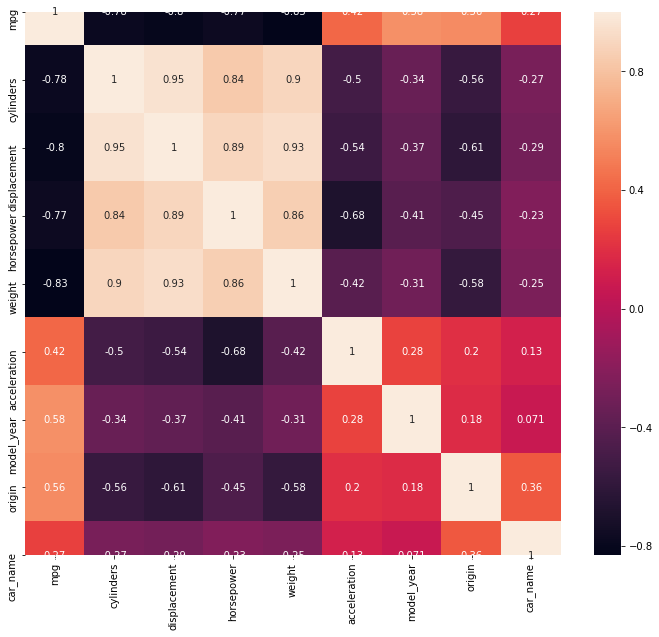

In [29]:
cor=Data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True)

# Checking for outliers

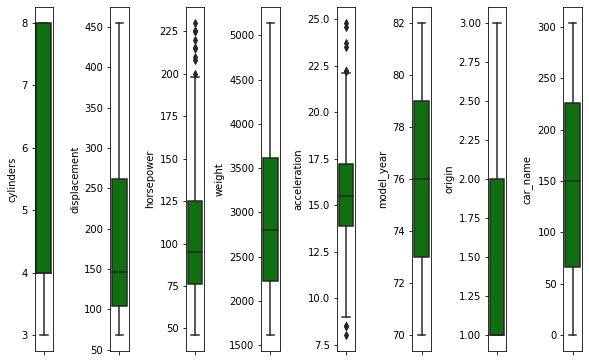

In [30]:
collist=Data.columns.values
ncol=10
nrows=10
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(Data[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [31]:
#Some how outliers are present in horsepower and acceleration.

In [32]:
#Removing the outliers
from scipy.stats import zscore
z=np.abs(zscore(Data))
z

array([[1.09184315, 1.50433563, 1.50662657, ..., 1.63493738, 0.71650657,
        1.26237816],
       [0.70777286, 1.50433563, 1.19926976, ..., 1.63493738, 0.71650657,
        0.91990502],
       [0.96381972, 1.50433563, 1.06480116, ..., 1.63493738, 0.71650657,
        1.50858447],
       ...,
       [1.08455517, 0.85389239, 0.55842696, ..., 1.62126734, 0.71650657,
        0.33350891],
       [0.57246145, 0.85389239, 0.70250046, ..., 1.62126734, 0.71650657,
        0.11413892],
       [0.95653174, 0.85389239, 0.71210536, ..., 1.62126734, 0.71650657,
        0.8930687 ]])

In [33]:
Data_new=Data[(z<3).all(axis=1)]
Data_new

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,15.0,8,350.0,165.0,3693,11.5,70,1,36
1,18.0,8,318.0,150.0,3436,11.0,70,1,231
2,16.0,8,304.0,150.0,3433,12.0,70,1,14
3,17.0,8,302.0,140.0,3449,10.5,70,1,161
4,15.0,8,429.0,198.0,4341,10.0,70,1,141
...,...,...,...,...,...,...,...,...,...
391,27.0,4,151.0,90.0,2950,17.3,82,1,43
392,27.0,4,140.0,86.0,2790,15.6,82,1,153
394,32.0,4,135.0,84.0,2295,11.6,82,1,119
395,28.0,4,120.0,79.0,2625,18.6,82,1,159


In [34]:
print(Data.shape)
print(Data_new.shape)

(397, 9)
(390, 9)


# Checking for skewness

In [35]:
Data.skew()

mpg             0.452893
cylinders       0.533598
displacement    0.726982
horsepower      1.100434
weight          0.535347
acceleration    0.275880
model_year      0.010233
origin          0.919911
car_name        0.013775
dtype: float64

In [36]:
Data['displacement']=np.sqrt(Data['displacement'])
Data['horsepower']=np.sqrt(Data['horsepower'])
Data['origin']=np.sqrt(Data['origin'])
Data.skew()

mpg             0.452893
cylinders       0.533598
displacement    0.476462
horsepower      0.739500
weight          0.535347
acceleration    0.275880
model_year      0.010233
origin          0.819636
car_name        0.013775
dtype: float64

In [38]:
Data['horsepower']=np.sqrt(Data['horsepower'])
Data['origin']=np.log(Data['origin'])
Data.skew()

mpg             0.452893
cylinders       0.533598
displacement    0.476462
horsepower      0.556419
weight          0.535347
acceleration    0.275880
model_year      0.010233
origin          0.732314
car_name        0.013775
dtype: float64

In [39]:
#Now the Data is normally distributed.

In [41]:
Data_new

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,15.0,8,350.0,165.0,3693,11.5,70,1,36
1,18.0,8,318.0,150.0,3436,11.0,70,1,231
2,16.0,8,304.0,150.0,3433,12.0,70,1,14
3,17.0,8,302.0,140.0,3449,10.5,70,1,161
4,15.0,8,429.0,198.0,4341,10.0,70,1,141
...,...,...,...,...,...,...,...,...,...
391,27.0,4,151.0,90.0,2950,17.3,82,1,43
392,27.0,4,140.0,86.0,2790,15.6,82,1,153
394,32.0,4,135.0,84.0,2295,11.6,82,1,119
395,28.0,4,120.0,79.0,2625,18.6,82,1,159


In [43]:
df_x=Data_new.iloc[:,1:]
df_x

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,8,350.0,165.0,3693,11.5,70,1,36
1,8,318.0,150.0,3436,11.0,70,1,231
2,8,304.0,150.0,3433,12.0,70,1,14
3,8,302.0,140.0,3449,10.5,70,1,161
4,8,429.0,198.0,4341,10.0,70,1,141
...,...,...,...,...,...,...,...,...
391,4,151.0,90.0,2950,17.3,82,1,43
392,4,140.0,86.0,2790,15.6,82,1,153
394,4,135.0,84.0,2295,11.6,82,1,119
395,4,120.0,79.0,2625,18.6,82,1,159


In [44]:
y=Data_new.iloc[:,0].values.reshape(-1,1)
y

array([[15. ],
       [18. ],
       [16. ],
       [17. ],
       [15. ],
       [14. ],
       [15. ],
       [15. ],
       [14. ],
       [15. ],
       [24. ],
       [22. ],
       [18. ],
       [21. ],
       [27. ],
       [26. ],
       [25. ],
       [24. ],
       [25. ],
       [26. ],
       [21. ],
       [10. ],
       [10. ],
       [11. ],
       [ 9. ],
       [27. ],
       [28. ],
       [25. ],
       [25. ],
       [19. ],
       [16. ],
       [17. ],
       [19. ],
       [18. ],
       [14. ],
       [14. ],
       [14. ],
       [14. ],
       [12. ],
       [13. ],
       [13. ],
       [18. ],
       [22. ],
       [19. ],
       [18. ],
       [23. ],
       [28. ],
       [30. ],
       [30. ],
       [31. ],
       [35. ],
       [27. ],
       [26. ],
       [24. ],
       [25. ],
       [23. ],
       [20. ],
       [21. ],
       [13. ],
       [14. ],
       [15. ],
       [14. ],
       [17. ],
       [11. ],
       [13. ],
       [12. ],
       [13

In [45]:
#Scaling the training Dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,1.530787,1.582458,1.727099,0.881065,-1.566306,-1.657634,-0.719424,-1.265746
1,1.530787,1.265359,1.308726,0.574393,-1.757175,-1.657634,-0.719424,0.925766
2,1.530787,1.126629,1.308726,0.570813,-1.375436,-1.657634,-0.719424,-1.512993
3,1.530787,1.106810,1.029811,0.589905,-1.948045,-1.657634,-0.719424,0.139069
4,1.530787,2.365296,2.647520,1.654310,-2.138914,-1.657634,-0.719424,-0.085701
...,...,...,...,...,...,...,...,...
385,-0.845360,-0.389501,-0.364766,-0.005541,0.647782,1.622589,-0.719424,-1.187076
386,-0.845360,-0.498503,-0.476332,-0.196466,-0.001175,1.622589,-0.719424,0.049161
387,-0.845360,-0.548050,-0.532115,-0.787139,-1.528132,1.622589,-0.719424,-0.332948
388,-0.845360,-0.696690,-0.671573,-0.393357,1.144043,1.622589,-0.719424,0.116592


# Machine Learning

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
max_r2_score=0
for i in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=i,test_size=0.25)
    Lr=LinearRegression()
    Lr.fit(train_x,train_y)
    pred=Lr.predict(test_x)
    r2_scr=r2_score(pred,test_y)
    if r2_scr>max_r2_score:
        max_r2_score=r2_scr
        final_r_state=i
    print('Max R2 score corresponding to ',final_r_state,' is ',max_r2_score)    

Max R2 score corresponding to  42  is  0.7651962815528249
Max R2 score corresponding to  42  is  0.7651962815528249
Max R2 score corresponding to  42  is  0.7651962815528249
Max R2 score corresponding to  45  is  0.783244022485829
Max R2 score corresponding to  45  is  0.783244022485829
Max R2 score corresponding to  45  is  0.783244022485829
Max R2 score corresponding to  48  is  0.8007257642851653
Max R2 score corresponding to  49  is  0.8186140578698677
Max R2 score corresponding to  50  is  0.8607448403080952
Max R2 score corresponding to  50  is  0.8607448403080952
Max R2 score corresponding to  50  is  0.8607448403080952
Max R2 score corresponding to  50  is  0.8607448403080952
Max R2 score corresponding to  50  is  0.8607448403080952
Max R2 score corresponding to  50  is  0.8607448403080952
Max R2 score corresponding to  50  is  0.8607448403080952
Max R2 score corresponding to  50  is  0.8607448403080952
Max R2 score corresponding to  50  is  0.8607448403080952
Max R2 score corr

In [47]:
#Checking if the model is under or overfitted
a_score=cross_val_score(Lr,x,y,cv=5,scoring='r2')
print(a_score)
print(np.mean(a_score))

[0.55015409 0.68452206 0.81428305 0.6936697  0.24051572]
0.596628921877192


In [49]:
#final_LinearRegression
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=50,test_size=0.25)
Lr=LinearRegression()
Lr.fit(train_x,train_y)
Lrpred=Lr.predict(test_x)
print('Predicted mpg: ',Lrpred)

Predicted mpg:  [[24.69062124]
 [16.13087663]
 [24.38781525]
 [21.23796768]
 [10.89113612]
 [26.95452727]
 [34.8122569 ]
 [30.11017684]
 [12.73433448]
 [29.05832658]
 [17.43602904]
 [23.01673602]
 [16.52862304]
 [21.3603057 ]
 [22.97200076]
 [23.50805647]
 [28.8773307 ]
 [31.76512553]
 [24.00335968]
 [19.59836514]
 [19.79462452]
 [22.00809712]
 [34.83934367]
 [32.97026467]
 [ 9.97846065]
 [17.26315979]
 [28.6102667 ]
 [25.21954301]
 [34.2400858 ]
 [20.09226546]
 [17.37160971]
 [31.08773626]
 [19.58470148]
 [30.33796428]
 [22.58216455]
 [26.30614297]
 [14.65134711]
 [21.42401779]
 [27.2370612 ]
 [24.81489326]
 [26.43767165]
 [12.86067729]
 [ 8.59828414]
 [29.44223685]
 [26.05682453]
 [29.76972898]
 [26.01321107]
 [26.77595337]
 [11.80752591]
 [22.2804545 ]
 [15.82842453]
 [19.61125629]
 [34.65626011]
 [25.31519289]
 [20.67922957]
 [12.14559235]
 [14.34981823]
 [35.6901622 ]
 [28.87355986]
 [14.62780314]
 [22.78570471]
 [31.23002249]
 [27.07475869]
 [15.30362799]
 [32.49194903]
 [16.3138

In [51]:
print('R2 score:',r2_score(Lrpred,test_y))
print('Mean Absolute Error',mean_absolute_error(Lrpred,test_y))
print('Mean Squared Error',mean_squared_error(Lrpred,test_y))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(Lrpred,test_y)))

R2 score: 0.8607448403080952
Mean Absolute Error 2.1809025990676423
Mean Squared Error 7.331996331844278
Root Mean Squared Error 2.707765930032409


Checking R2 score by other algorithms

In [52]:
from sklearn.svm import SVR
sv=SVR()
param={'kernel':['rbf','poly','linear']}
gd_sr=GridSearchCV(estimator=sv,param_grid=param,scoring='r2',cv=5)
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_score=gd_sr.best_score_
print(best_score)

{'kernel': 'rbf'}
0.7992851065448163


In [53]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
param={'criterion':['mae','mse','friedman_mse']}
gd_sr=GridSearchCV(estimator=dt,param_grid=param,scoring='r2',cv=5)
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_score=gd_sr.best_score_
print(best_score)

{'criterion': 'mae'}
0.7493013806364984


In [56]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
param={'n_neighbors':[50,100,150,200,230]}
gd_sr=GridSearchCV(estimator=knn,param_grid=param,scoring='r2',cv=5)
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_score=gd_sr.best_score_
print(best_score)

{'n_neighbors': 50}
0.745939465130607


Checking r2 score by ensemble methods

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
param={'n_estimators':[100,200,300]}
gd_sr=GridSearchCV(estimator=rf,param_grid=param,scoring='r2',cv=5)
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_score=gd_sr.best_score_
print(best_score)

{'n_estimators': 200}
0.8598301710088213


In [60]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
param={'n_estimators':[100,200,300]}
gd_sr=GridSearchCV(estimator=gb,param_grid=param,scoring='r2',cv=5)
gd_sr.fit(train_x,train_y)
best_param=gd_sr.best_params_
print(best_param)
best_score=gd_sr.best_score_
print(best_score)

{'n_estimators': 100}
0.859476003494989


Conclusion: From all the analysis and from all model testing we found that LinearRegression has the highest R2 score of 0.8607448403080952 that is 86.07%. So we save the prediction and save the model for production.

In [62]:
test1=np.array([2,22,1,12,33,5,11,6]).reshape(1,-1)
Lr.predict(test1)

array([[33.11205027]])

In [63]:
test2=np.array([2,22,6,1,23,5,31,6]).reshape(1,-1)
Lr.predict(test2)

array([[109.37712546]])

In [64]:
#Saving the prediction
df=pd.DataFrame(Lrpred)
df.to_csv('Auto_csv.csv')

In [65]:
#Saving the model for production
from sklearn.externals import joblib
joblib.dump(Lr,'Auto_csv.obj')

['Auto_csv.obj']